In [2]:
%matplotlib inline

import numpy as np               # les tableaux, les fonctions mathématiques, etc.
import matplotlib.pyplot as plt  # les graphes
from matplotlib import animation # les animations
import datetime                  # gestion des dates

from celestialbody import CelestialBody # position des principaux objets du système solaire
import celestialbody

# Comment connaitre la position d'une planète à un instant donné ?

In [2]:
# création de l'objet Python correspondant à la planète, l'astéroide ou la comète choisie
body = CelestialBody("Mars")

# vous avez le choix dans la date
date = datetime.datetime(2021,2,18) # Perseverance se pose sur Mars
body.date = date

# coordonnées de la position de l'objet dans le référentiel ecliptique héliocentrique
body.position

(-0.0057727483433337445, 1.5698184461545464, 0.03297198596449348)

# (Prof) Entendu. Mais peut-on connaitre ses positions successives ?
### Bien sûr : par exemple entre le 1er janvier 2021 et le 13 août 2021

In [3]:
body = CelestialBody("Venus")

debut = datetime.datetime(2021,1,1)
fin   = datetime.datetime(2021,8,13)
X = body.data("X", start=debut, stop=fin)
Y = body.data("Y", start=debut, stop=fin)
Z = body.data("Z", start=debut, stop=fin)

# X,Y et Z contiennent les coordonnées cartésiennes de Vénus
# par exemple
print(X)

[-0.4464645  -0.31019725 -0.15858521  0.00084332  0.16023439  0.31178167
  0.44808896  0.56250865  0.64944519  0.70461344  0.72524297  0.71021987
  0.66015847  0.57739649  0.46590911  0.33114029  0.17975408  0.01931348
 -0.1420996  -0.29630385 -0.43545368 -0.55246253 -0.64138677 -0.69774457
 -0.71874922 -0.70344328 -0.65272797 -0.56929031 -0.45743743]


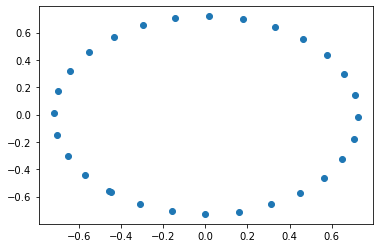

In [4]:
plt.plot(X,Y, "o")

Rq : la trajectoire parait elliptique car l'échelle des abscisses et celle des ordonnées n'est pas la même.

### (Prof) Bien. Et maintenant, puis-je changer la période d'échantillonnage ? Bien sûr !

Par défaut, il y a 25 points par période de révolution pour avoir un tracé lisible en cas de représentation graphique.

In [5]:
pas = 16 # en jours
X = body.data("X", start=debut, stop=fin, step=pas)
Y = body.data("Y", start=debut, stop=fin, step=pas)
Z = body.data("Z", start=debut, stop=fin, step=pas)

# X,Y et Z contiennent les coordonnées cartésiennes de Vénus
# par exemple
print(X)

[-0.4464645  -0.15858521  0.16023439  0.44808896  0.64944519  0.72524297
  0.66015847  0.46590911  0.17975408 -0.1420996  -0.43545368 -0.64138677
 -0.71874922 -0.65272797 -0.45743743]


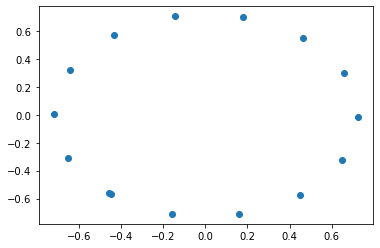

In [6]:
plt.plot(X,Y, "o")

# (Prof) Super. Et si je souhaite créer un fichier de données ?

In [11]:
body = CelestialBody("Jupiter")

# Création d'un fichier jupiter.txt contenant les coordonnées cartésiennes x,y
body.data_position_txt()

'jupiter.txt'

In [12]:
with open("mercury.txt", "r") as f:
    content = f.readlines()
content

['# fichier mercury.txt\n',
 '####################################\n',
 '# days between two positions: 3 \n',
 '# first line date:  6/ 3/2021\n',
 '####################################\n',
 'X (au)              Y (au)              \n',
 '-0.2511             -0.3842             \n',
 '-0.1944             -0.421              \n',
 '-0.1324             -0.4466             \n',
 '-0.067              -0.4604             \n',
 '0.0002              -0.4622             \n',
 '0.0673              -0.4516             \n',
 '0.1326              -0.4286             \n',
 '0.1941              -0.3932             \n',
 '0.2495              -0.3456             \n',
 '0.2965              -0.2865             \n',
 '0.3324              -0.2167             \n',
 '0.3545              -0.138              \n',
 '0.3598              -0.0528             \n',
 '0.3455              0.0352              \n',
 '0.3096              0.1208              \n',
 '0.2515              0.1976              \n',
 '0.1733    

### (Prof) Evidemment, il est encore possible de changer la période d'échantillonage, le début et la fin du fichier.

In [14]:
body = CelestialBody("Mercury")

debut = datetime.datetime(2021,1,1)
fin   = datetime.datetime(2021,3,29)
pas   = 1

body.data_position_txt(start=debut, stop=fin, step=pas)

'mercury.txt'

### (Élève) Un début de programme utilisable par les élèves exploitant ce fichier serait alors :

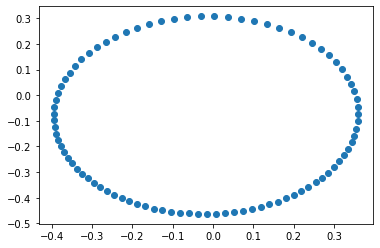

In [18]:
data = np.loadtxt("mercury.txt", skiprows=6)
x, y = data[:,0], data[:,1]
plt.plot(x,y, "o")

# (Prof) En seconde, on peut présenter l'influence du choix de référentiel : 

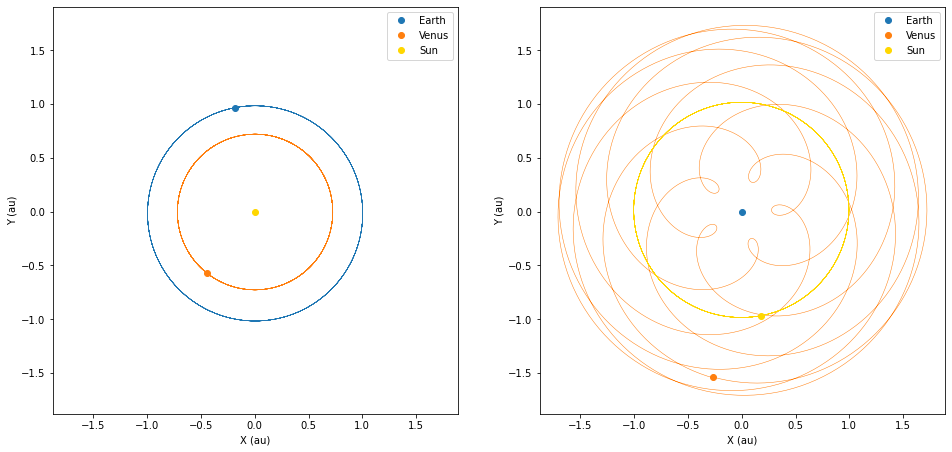

In [4]:
import display

debut = datetime.datetime(2021, 1, 1)
fin   = datetime.datetime(2029, 1, 1)
pas   = 2

fig = display.frame_of_reference(["Earth", "Venus"], ref="Earth", start=debut, stop=fin, step=pas)

Une approche par l'histoire des sciences est alors envisageable (Ptolémée, Copernic).

# (Prof) En terminale, on peut illustrer les lois de Kepler :

Text(0, 0.5, 'Y (au)')

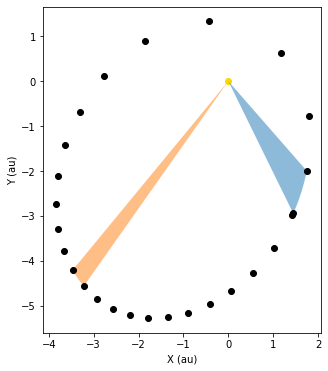

In [20]:
start = datetime.datetime.today()
step  = 1

fig = plt.figure(figsize=(6,6))

body = CelestialBody("Churyumov-Gerasimenko")
days = body.data("days", start=start)
data_orbit = body.data("position", start=start)
start1, start2 = start, start + datetime.timedelta(days=int(days[int(len(days)/2)]))
data1      = body.data("position", start=start1, stop=start1 + datetime.timedelta(days=int(days[1])), step=1)
data2      = body.data("position", start=start2, stop=start2 + datetime.timedelta(days=int(days[1])), step=1)

x, y = data_orbit[:,0], data_orbit[:,1]
plt.scatter(0,0, marker="o", color="gold")
plt.plot(x,y, "ok")
for data in [data1, data2]:
    x, y = [0]+list(data[:,0]), [0]+list(data[:,1])
    plt.fill(x,y, alpha=.5)
fig.axes[0].set_aspect("equal")
plt.xlabel("X (au)")
plt.ylabel("Y (au)")

# (Élève) Un exemple de code pour illustrer la troisième loi de Kepler
### Jusqu'à 8 planètes, 547&thinsp;966 astéroïdes et 3&thinsp;714 comètes

On peut laisser les élèves déterminer les exposants à utiliser pour retrouver la loi et jouer avec la commande plt.plot

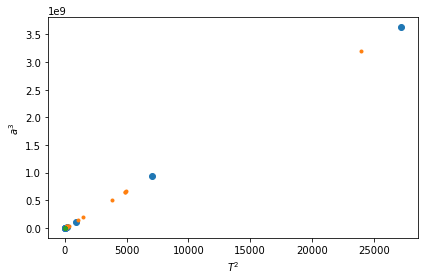

In [12]:
plt.figure(figsize=(6,4))

a, T = [], []
# On prend les données sur toutes les planètes
for name in celestialbody.PLANETS:
    body = CelestialBody(name)
    a.append(body.a)
    T.append(body.period)
a = np.array(a)
T = np.array(T) 
plt.plot(a**3, T**2, "o", label="Planètes")

a, T = [], []
# On prend les données sur les cent premières comètes
for name in celestialbody.COMETS[:100]:
    body = CelestialBody(name)
    a.append(body.a)
    T.append(body.period)
a = np.array(a)
T = np.array(T)
plt.plot(a**3, T**2, ".", label="Comètes")

a, T = [], []
# On prend les données sur les cent premièrs astéroïdes
for name in celestialbody.ASTEROIDS[:100]:
    body = CelestialBody(name)
    a.append(body.a)
    T.append(body.period)
a = np.array(a)
T = np.array(T)
plt.plot(a**3, T**2, ".", label="Astéroïdes")

plt.xlabel(r"$T^2$")
plt.ylabel(r"$a^3$")
plt.tight_layout()

Rq : En échelle log :

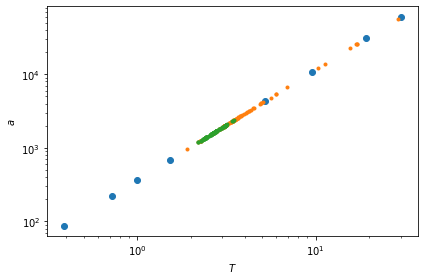

In [14]:
plt.figure(figsize=(6,4))

a, T = [], []
# On prend les données sur toutes les planètes
for name in celestialbody.PLANETS:
    body = CelestialBody(name)
    a.append(body.a)
    T.append(body.period)
a = np.array(a)
T = np.array(T) 
plt.loglog(a,T, "o", label="Planètes")

a, T = [], []
# On prend les données sur les cent premières comètes
for name in celestialbody.COMETS[:100]:
    body = CelestialBody(name)
    a.append(body.a)
    T.append(body.period)
a = np.array(a)
T = np.array(T)
plt.loglog(a, T, ".", label="Comètes")

a, T = [], []
# On prend les données sur les cent premièrs astéroïdes
for name in celestialbody.ASTEROIDS[:100]:
    body = CelestialBody(name)
    a.append(body.a)
    T.append(body.period)
a = np.array(a)
T = np.array(T)
plt.plot(a,T, ".", label="Astéroïdes")

plt.xlabel(r"$T$")
plt.ylabel(r"$a$")
plt.tight_layout()

# (Prof) La 2D c'est bien mais la 3D c'est mieux !

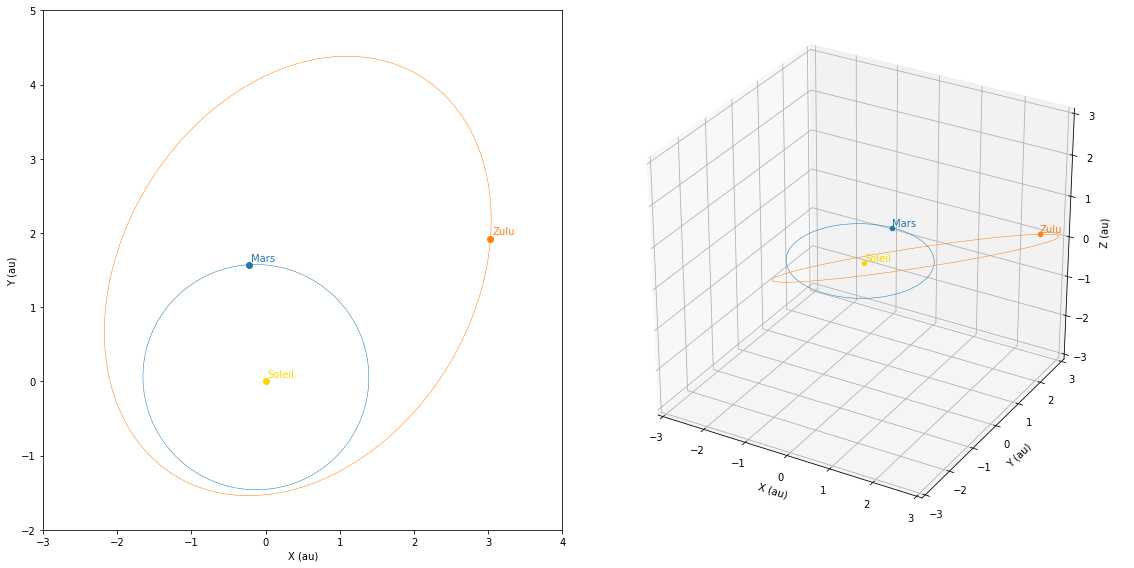

In [5]:
plt.figure(figsize=(16,8))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1), projection='3d')
for ax in [ax1, ax2]:
    ax.set_xlabel("X (au)")
    ax.set_ylabel("Y (au)")
ax2.set_zlabel("Z (au)")

ax1.scatter(0,0, marker="o", color="gold")
ax1.annotate("Soleil", (0,0), color="gold", textcoords="offset points", xytext=(2,2),
             fontsize="medium", horizontalalignment='left', verticalalignment='bottom', alpha=1)
ax2.scatter(0,0,0, marker="o", color="gold")
ax2.text(0,0,0,  "Soleil", fontsize="medium",  color="gold", horizontalalignment='left', verticalalignment='bottom')

for i, name in enumerate(["Mars", "Zulu"]):
    body = CelestialBody(name)
    body.date = datetime.datetime.today()

    # Représentation de l'orbite
    x,y,z = body.position
    X,Y,Z = body.orbit

    # Gestion des limites, etc.
    ax1.set_xlim(-3,4)
    ax1.set_ylim(-2,5)
    ax1.set_aspect("equal")
    
    a_lim = 3
    ax2.set_xlim(-a_lim,a_lim)
    ax2.set_ylim(-a_lim,a_lim)
    ax2.set_zlim(-a_lim,a_lim)
    plt.tight_layout()

    ax1.scatter(x,y, marker="o", color="C"+str(i))
    ax1.plot(X,Y, color="C"+str(i), linewidth=.5)
    ax1.annotate(body.name, (x,y), color="C"+str(i), textcoords="offset points", xytext=(2,2),
                 fontsize="medium", horizontalalignment='left', verticalalignment='bottom', alpha=1)

    ax2.scatter(x,y,z, marker="o", color="C"+str(i))
    ax2.plot(X,Y,Z, color="C"+str(i), linewidth=.5)
    ax2.text(x,y,z,  body.name, fontsize="medium",  color="C"+str(i), horizontalalignment='left', verticalalignment='bottom')

# (Prof) Une animation ? Pas de problème.

### Heliocentrique ou géocentrique ? Vecteur vitesse ou pas vecteur vitesse ? Il suffit de changer les options.

In [32]:
%matplotlib qt

###########
# OPTIONS #
###########
show_speed = False
referentiel = "heliocentric" # "heliocentric" or "geocentric"
start = datetime.datetime(2021,1,1)
stop  = datetime.datetime(2029,1,1)
step  = 2
fps = 25

########
# DATA #
########
earth = CelestialBody("EM Bary")
x_earth, y_earth, z_earth, _ = earth.trajectory(start, stop, step)
mars  = CelestialBody("Mars")
x_mars, y_mars, z_mars, _    = mars.trajectory(start, stop, step)
venus = CelestialBody("Venus")
x_venus, y_venus, z_venus, _ = venus.trajectory(start, stop, step)
x_sun, y_sun = np.zeros(len(x_earth)), np.zeros(len(x_earth))

if referentiel == "heliocentric":
    x_sun_ref, y_sun_ref = x_sun, y_sun
    x_earth_ref, y_earth_ref = x_earth, y_earth
    x_mars_ref, y_mars_ref = x_mars, y_mars
    x_venus_ref, y_venus_ref = x_venus, y_venus
elif referentiel == "geocentric":
    x_sun_ref, y_sun_ref = x_sun-x_earth, y_sun-y_earth
    x_earth_ref, y_earth_ref = x_earth-x_earth, y_earth-y_earth
    x_mars_ref, y_mars_ref = x_mars-x_earth, y_mars-y_earth
    x_venus_ref, y_venus_ref = x_venus-x_earth, y_venus-y_earth

##########
# FIGURE #
##########
fig = plt.figure(figsize=(6,6))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))
ax.set_aspect("equal")
a_lim = 2
ax.set_xlim(-a_lim,a_lim)
ax.set_ylim(-a_lim,a_lim)
ax.set_xlabel("X (au)")
ax.set_ylabel("Y (au)")
plt.tight_layout()

sun,              = ax.plot([], [], "o", color="gold", label="Soleil")
trajectory_sun,   = ax.plot([], [], "-", color="gold", linewidth=.1)
sun_speed         = ax.quiver(0,0,0,0, color="gold", alpha=.5, width=.005, angles='xy', scale_units='xy', scale=1)
planet_venus,     = ax.plot([], [], "oC1", label="Vénus")
trajectory_venus, = ax.plot([], [], "-C1", linewidth=.1)
venus_speed       = ax.quiver(0,0,0,0, color="C1", alpha=.5, width=.005, angles='xy', scale_units='xy', scale=1)
planet_earth,     = ax.plot([], [], "oC2", label="Terre")
trajectory_earth, = ax.plot([], [], "-C2", linewidth=.1)
earth_speed       = ax.quiver(0,0,0,0, color="C2", alpha=.5, width=.005, angles='xy', scale_units='xy', scale=1)
#planet_mars,      = ax.plot([], [], "oC3", label="Mars")
#trajectory_mars,  = ax.plot([], [], "-C3", linewidth=.1)
#mars_speed        = ax.quiver(0,0,0,0, color="C3", alpha=.5, width=.005, angles='xy', scale_units='xy', scale=1)

xs = [x_sun_ref, x_venus_ref, x_earth_ref]
ys = [y_sun_ref, y_venus_ref, y_earth_ref]
positions    = [sun, planet_venus, planet_earth]
trajectories = [trajectory_sun, trajectory_venus, trajectory_earth]
speeds       = [sun_speed, venus_speed, earth_speed]

def init():
    for pos, trajectory in zip(positions, trajectories):
        pos.set_data([], [])
        trajectory.set_data([], [])
    return
def animate(i):
    for x, y, pos, trajectory, speed in zip(xs, ys, positions, trajectories, speeds):
        pos.set_data(x[i], y[i])
        trajectory.set_data(x[:i], y[:i])
        if i<len(x)-1 and show_speed:
            scale=10
            u, v = scale*(x[i+1]-x[i])/step, scale*(y[i+1]-y[i])/step
            speed.set_UVC(u,v)
            speed.set_offsets((x[i], y[i]))
    return

plt.legend(loc="upper left")

anim = animation.FuncAnimation(fig, animate, frames=len(x_earth)-1, interval=1e3/fps, init_func=init)